<a href="https://colab.research.google.com/github/river6907/Bigdata-Analysis/blob/main/Heart6_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 6. 심장질환(Heart Disease) 데이터 분석 연습

<데이터 속성>

Age : 나이 , Sex : 성별 (1 = male 0 = female) , RestBP : 혈압 (resting blood pressure , mmHg),
Chol : 혈청 (cholestoral mg / dl), MaxHR : 최대 심박수, Ca : 주요 혈관수 (0-3)
AHD : 심장병 진단 결과 (혈관 조영 상태), No : 주요혈관 축소 50%미만, Yes: 주요혈관 축소 50%이상

<문제>

(1) heart6.csv 파일을 읽어 heart에 대입

In [1]:
from google.colab import files
myfile = files.upload()

Saving Heart6.csv to Heart6.csv


In [3]:
import io
import pandas as pd
heart = pd.read_csv(io.BytesIO(myfile['Heart6.csv']))

In [ ]:
heart

(2) heart의 데이터 타입들 행레이블, 열레이블 , 크기 확인

In [5]:
heart.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
RestBP          int64
Chol            int64
MaxHR           int64
Ca            float64
AHD            object
dtype: object

In [24]:
print("heart.index = \n", heart.index)     
print("\nheart.columns = \n", heart.columns) 
print("\nindex.count = ", heart.shape[0])
print("columns.count = ", heart.shape[1])

heart.index = 
 Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            292, 293, 294, 295, 296, 297, 298, 299, 300, 301],
           dtype='int64', length=299)

heart.columns = 
 Index(['Age', 'Sex', 'RestBP', 'Chol', 'MaxHR', 'Ca', 'AHD'], dtype='object')

index.count =  299
columns.count =  7


(3) Unnamed: 0 열 삭제 (원본에서 삭제) 

In [10]:
heart = heart.drop(['Unnamed: 0'], axis=1)

In [11]:
heart

,Age,Sex,RestBP,Chol,MaxHR,Ca,AHD
0,63,1,145,233,150,0.0,No
1,67,1,160,286,108,3.0,Yes
2,67,1,120,229,129,2.0,Yes
3,37,1,130,250,187,0.0,No
4,41,0,130,204,172,0.0,No
...,...,...,...,...,...,...,...
298,45,1,110,264,132,0.0,Yes
299,68,1,144,193,141,2.0,Yes
300,57,1,130,131,115,1.0,Yes
301,57,0,130,236,174,1.0,Yes


(4) 누락된 데이터의 합 확인 후 행삭제

In [12]:
import pandas as pd
heart.isnull().sum()

Age       0
Sex       0
RestBP    0
Chol      0
MaxHR     0
Ca        4
AHD       0
dtype: int64

In [14]:
heart = heart.dropna(axis=0)

In [15]:
heart.isnull().sum()

Age       0
Sex       0
RestBP    0
Chol      0
MaxHR     0
Ca        0
AHD       0
dtype: int64

(5) sex 변경 (1 = male 0 = female) 

In [17]:
heart['Sex'].replace([0,1],['female','male'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [20]:
print(heart.head(5))
print(heart.tail(5))

   Age     Sex  RestBP  Chol  MaxHR   Ca  AHD
0   63    male     145   233    150  0.0   No
1   67    male     160   286    108  3.0  Yes
2   67    male     120   229    129  2.0  Yes
3   37    male     130   250    187  0.0   No
4   41  female     130   204    172  0.0   No
     Age     Sex  RestBP  Chol  MaxHR   Ca  AHD
297   57  female     140   241    123  0.0  Yes
298   45    male     110   264    132  0.0  Yes
299   68    male     144   193    141  2.0  Yes
300   57    male     130   131    115  1.0  Yes
301   57  female     130   236    174  1.0  Yes


(6) 통계요약

In [21]:
heart.describe()

,Age,RestBP,Chol,MaxHR,Ca
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.528428,131.668896,247.100334,149.505017,0.672241
std,9.020950,17.705668,51.914779,22.954927,0.937438
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,242.000000,153.000000,0.000000
75%,61.000000,140.000000,275.500000,165.500000,1.000000
max,77.000000,200.000000,564.000000,202.000000,3.000000


(7) 나이 역순으로 정렬

In [25]:
heart_age = heart.sort_values(by='Age',ascending=False )
display(heart_age)

,Age,Sex,RestBP,Chol,MaxHR,Ca,AHD
161,77,male,125,304,162,3.0,Yes
257,76,female,140,197,116,0.0,No
233,74,female,120,269,121,1.0,No
42,71,female,160,302,162,2.0,No
103,71,female,110,265,130,1.0,No
...,...,...,...,...,...,...,...
283,35,male,122,192,174,0.0,No
138,35,male,120,198,130,0.0,Yes
225,34,female,118,210,192,0.0,No
101,34,male,118,182,174,0.0,No


(8) 나이에 대한 히스토그램과 확률밀도 확인

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


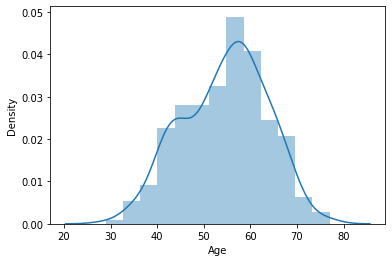

In [26]:
import seaborn as sns
ax = sns.distplot(heart['Age'])

(9) 성별과 AHD에 대한 평균 혈압 테이블을 구성하여 heart2에 저장 , 비교 그래프 그리기

In [27]:
heart.head()

,Age,Sex,RestBP,Chol,MaxHR,Ca,AHD
0,63,male,145,233,150,0.0,No
1,67,male,160,286,108,3.0,Yes
2,67,male,120,229,129,2.0,Yes
3,37,male,130,250,187,0.0,No
4,41,female,130,204,172,0.0,No


In [29]:
import numpy as np
heart2 = pd.pivot_table(heart, values='RestBP', index='Sex', columns='AHD',aggfunc=np.mean)
display("heart2=", heart2)

'heart2='

AHD,No,Yes
Sex,,
female,128.736111,146.600000
male,129.516854,131.929204


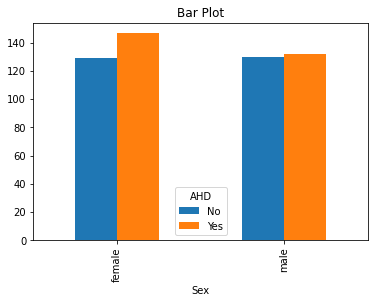

In [32]:
import matplotlib.pyplot as plt
heart2.plot.bar()
plt.title("Bar Plot")
plt.show()

(10) 나이와 혈압과의 관계를 확인하기 위하여 scatter plot을 그리고 제목에 상관계수 출력

In [37]:
from scipy import stats
heart_corr = stats.pearsonr()_

In [38]:
heart_corr

(0.29069633284350127, 3.1130912969951895e-07)

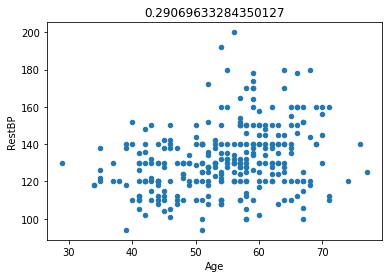

In [43]:
heart.plot.scatter(x="Age", y="RestBP")
plt.title(heart['Age'].corr(heart['RestBP']))
plt.show()

(11) AHD 변경, No=0, Yes=1 

In [45]:
heart['AHD'].replace(['No','Yes'],['0','1'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [46]:
heart.head()

,Age,Sex,RestBP,Chol,MaxHR,Ca,AHD
0,63,male,145,233,150,0.0,0
1,67,male,160,286,108,3.0,1
2,67,male,120,229,129,2.0,1
3,37,male,130,250,187,0.0,0
4,41,female,130,204,172,0.0,0


(12) AHD를 색으로 지정한 scatter_matrix 그리기

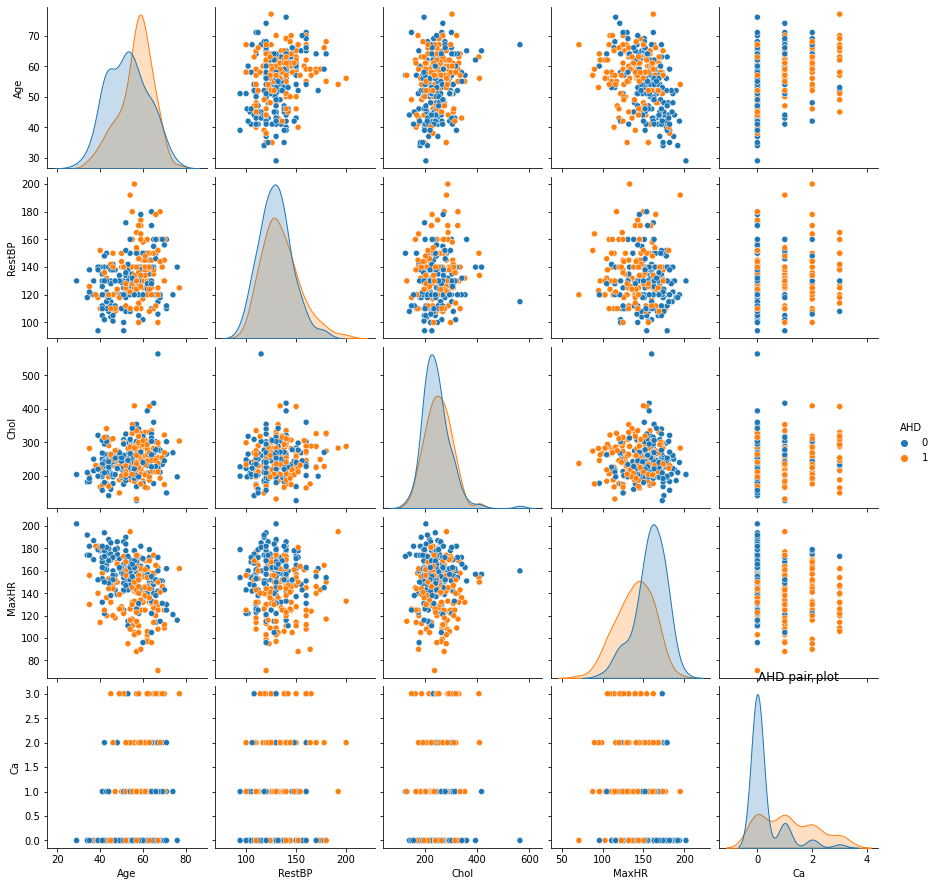

In [60]:
sns.pairplot(data=heart,hue='AHD')
plt.title("AHD pair plot")
plt.show()

(13) heart에서 'RestBP', 'Chol' 'MaxHR', 'Ca' 'AHD' 칼럼만 추출 heart3에 저장 (iloc 사용) 

In [56]:
heart.tail()

,Age,Sex,RestBP,Chol,MaxHR,Ca,AHD
297,57,female,140,241,123,0.0,1
298,45,male,110,264,132,0.0,1
299,68,male,144,193,141,2.0,1
300,57,male,130,131,115,1.0,1
301,57,female,130,236,174,1.0,1


In [57]:
heart3 = heart.iloc[0:,2:7]
heart3

,RestBP,Chol,MaxHR,Ca,AHD
0,145,233,150,0.0,0
1,160,286,108,3.0,1
2,120,229,129,2.0,1
3,130,250,187,0.0,0
4,130,204,172,0.0,0
...,...,...,...,...,...
297,140,241,123,0.0,1
298,110,264,132,0.0,1
299,144,193,141,2.0,1
300,130,131,115,1.0,1


(14) heart3의 상관 계수 확인

In [58]:
heart3.corr()

,RestBP,Chol,MaxHR,Ca
RestBP,1.000000,0.132284,-0.048053,0.098773
Chol,0.132284,1.000000,0.002179,0.119000
MaxHR,-0.048053,0.002179,1.000000,-0.264246
Ca,0.098773,0.119000,-0.264246,1.000000


(15) 속성 4개('RestBP', 'Chol', 'MaxHR', 'Ca')는 data로, 심장병 판정결과('AHD')는 target에 저장

In [61]:
data = heart3.iloc[0:,0:4]
target = heart3.iloc[0:,4]

In [63]:
print("data = ",data)
print("target = ",target)

data =       RestBP  Chol  MaxHR   Ca
0       145   233    150  0.0
1       160   286    108  3.0
2       120   229    129  2.0
3       130   250    187  0.0
4       130   204    172  0.0
..      ...   ...    ...  ...
297     140   241    123  0.0
298     110   264    132  0.0
299     144   193    141  2.0
300     130   131    115  1.0
301     130   236    174  1.0

[299 rows x 4 columns]
target =  0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: AHD, Length: 299, dtype: object
